In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Wisconsin.csv')

In [3]:
data.shape

(569, 32)

In [4]:
# droping the id column since it's irrelevant
data.drop('id', axis = 1, inplace = True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


assigning:
* M as Maligant Tumor to 1
* B as Benign Tumor to 0

In [7]:
df = data.copy()

In [8]:
def cat_to_binary(col):
    if col == "M":
        return 1
    else:
        return 0

In [9]:
df['diagnosis'] = df['diagnosis'].apply(cat_to_binary)

For indexing purposes, separating the features in 3 distinct categories:
* feature_mean
* feature_se (standard error)
* feature_worst 

In [10]:
features_mean = df.columns[1:11]
features_se = df.columns[11:21]
features_worst = df.columns[21:31]
allfeatures = df.columns[1:]
print(features_mean)
print(features_se)
print(features_worst)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Exploratory Data Analysis

1. Diagnosis Distribution

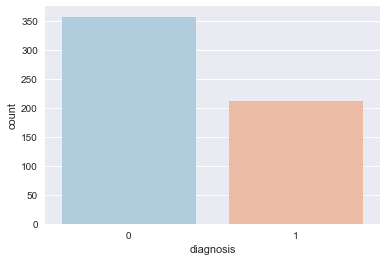

In [11]:
sns.countplot(x = 'diagnosis', data = df, palette ='RdBu_r')

In [12]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


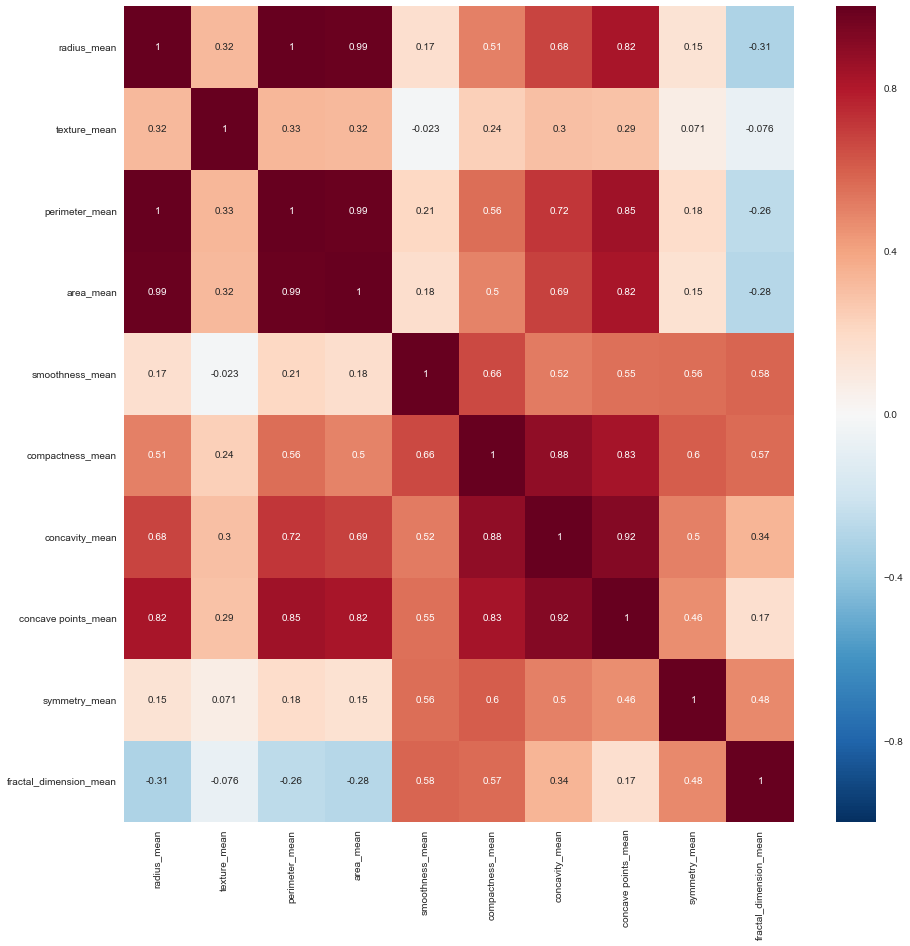

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_mean].corr(), annot=True)

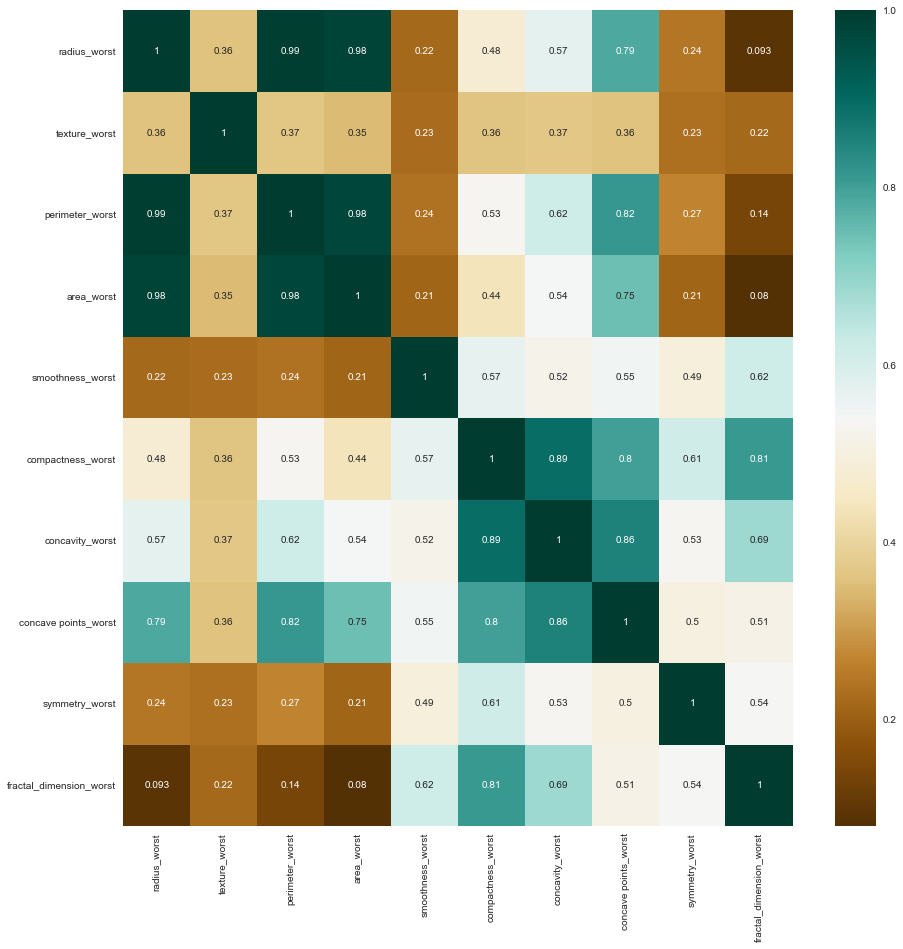

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_worst].corr(), annot=True, cmap='BrBG')

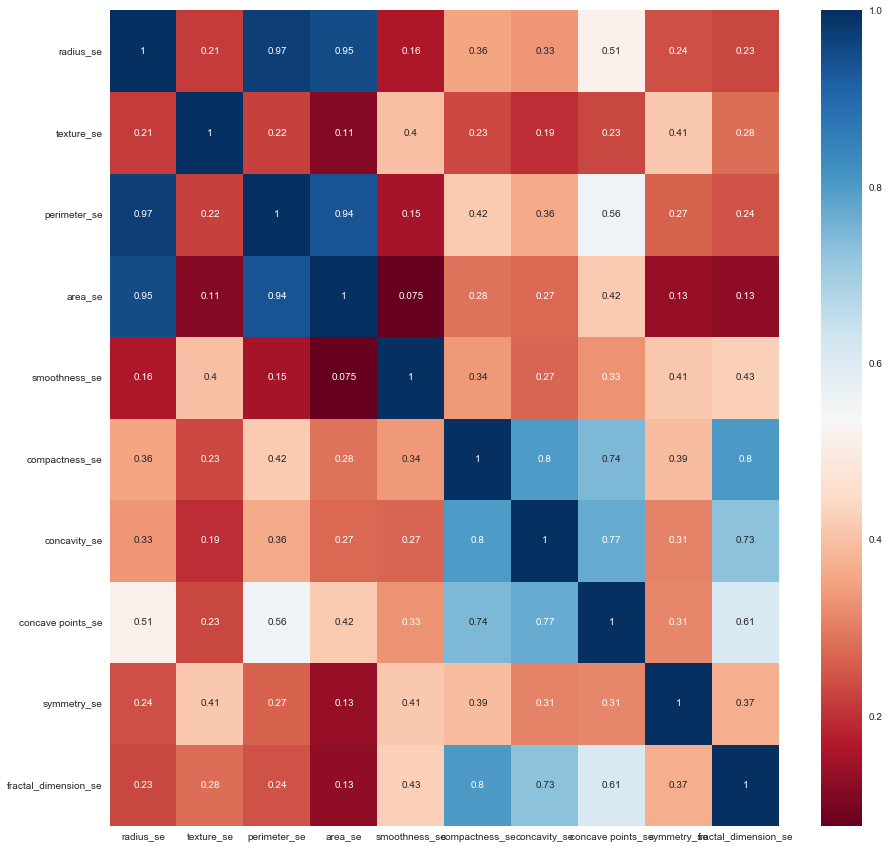

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_se].corr(), annot=True, cmap='RdBu')

Above heatmaps shows high correlation between certain features in all three cases, as follows:
* High correlation between 'radius', 'area', and 'perimeter'
* Relatively high correlation between 'compactness', 'concavity', and 'concave points'

I'll go ahead and remove features with more than .9 correlation, which are:
- perimeter_mean, perimeter_se, perimeter_worst
- area_mean, area_se, area_worst
- concave points_mean

Now let's see the correlation in features for each case 'mean', 'se', 'worst'

In [16]:
features_mean_2 = features_mean.drop(['perimeter_mean','area_mean','concave points_mean'])
features_se_2 = features_se.drop(['perimeter_se', 'area_se'])
features_worst_2 = features_worst.drop('perimeter_worst','area_worst')
allfeatures_2 = allfeatures.drop(['perimeter_mean','area_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se','perimeter_worst','area_worst'])

In [17]:
# a feature list made in order to compare each feature in the 3 cases of 'mean', 'se', and 'worst'
features_cat = []
columns_list = np.array(allfeatures)
gen = ([i, i+10, i+20] for i in range(10))
for x in gen:
    features_cat.append(columns_list[x].tolist())

In [18]:
# let's try it out for the radius
df[features_cat[3]].describe()

,area_mean,area_se,area_worst
count,569.000000,569.000000,569.000000
mean,654.889104,40.337079,880.583128
std,351.914129,45.491006,569.356993
min,143.500000,6.802000,185.200000
25%,420.300000,17.850000,515.300000
50%,551.100000,24.530000,686.500000
75%,782.700000,45.190000,1084.000000
max,2501.000000,542.200000,4254.000000


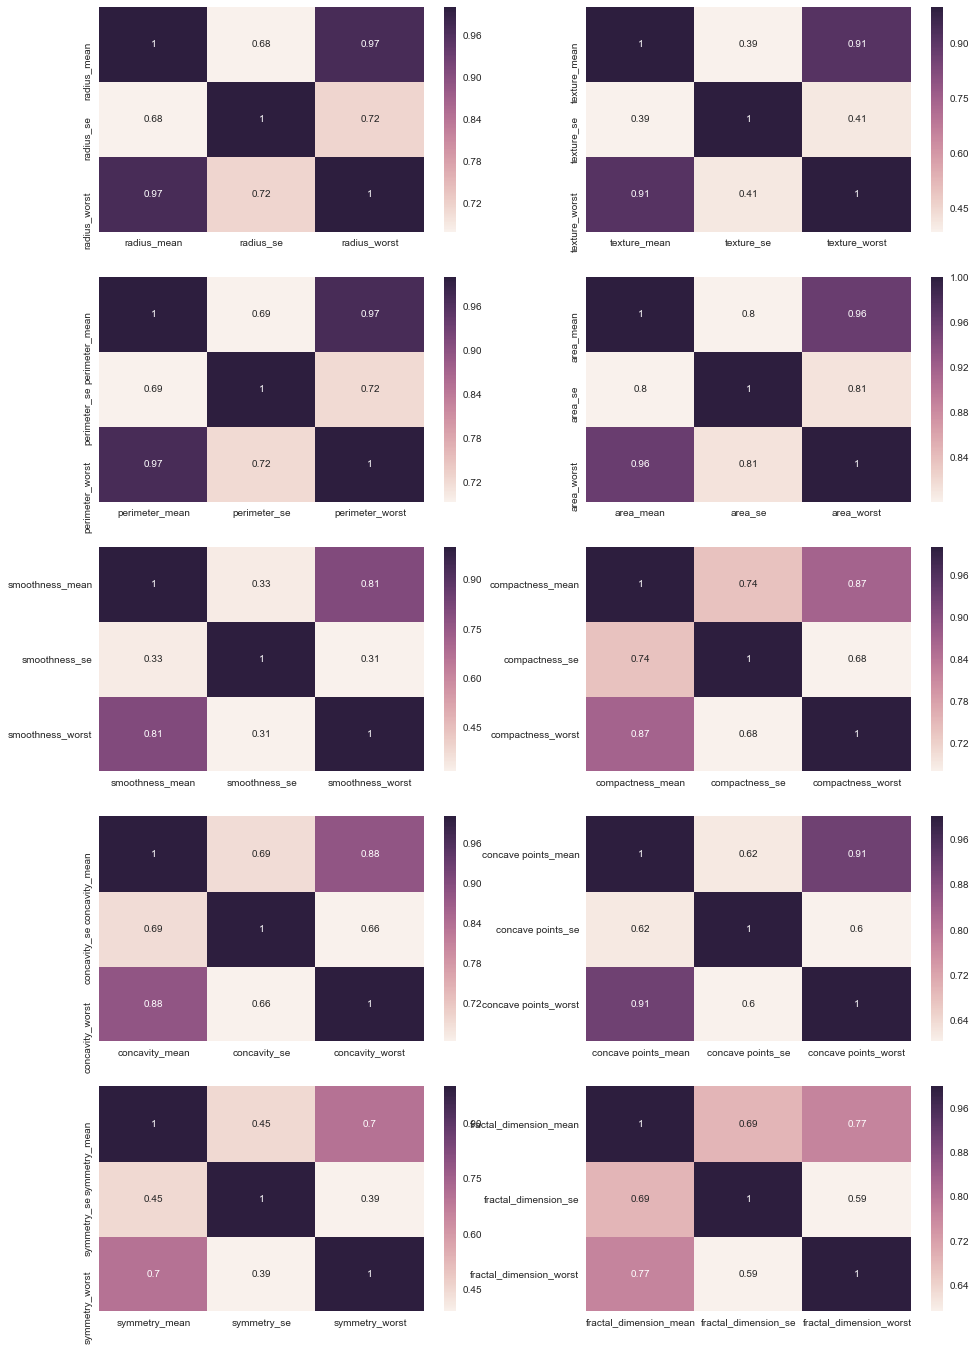

In [19]:
plt.figure(figsize=(16,24))
for i in range(10):
    plt.subplot(5,2,i+1)
    sns.heatmap(df[features_cat[i]].corr(), annot=True)

above heatmaps shows correlation between 'mean' case and the 'worst' case of the following features:
* radius
* texture

I'll drop radius_worst and texture_worst as well

In [20]:
features_worst_2 = features_worst.drop(['radius_worst', 'texture_worst'])
allfeatures_2 = allfeatures_2.drop(['radius_worst', 'texture_worst'])

Now I have a smaller version of features set which I can use for my calculations and for showing results

Now lets plot a scatter plot for the new features_mean:

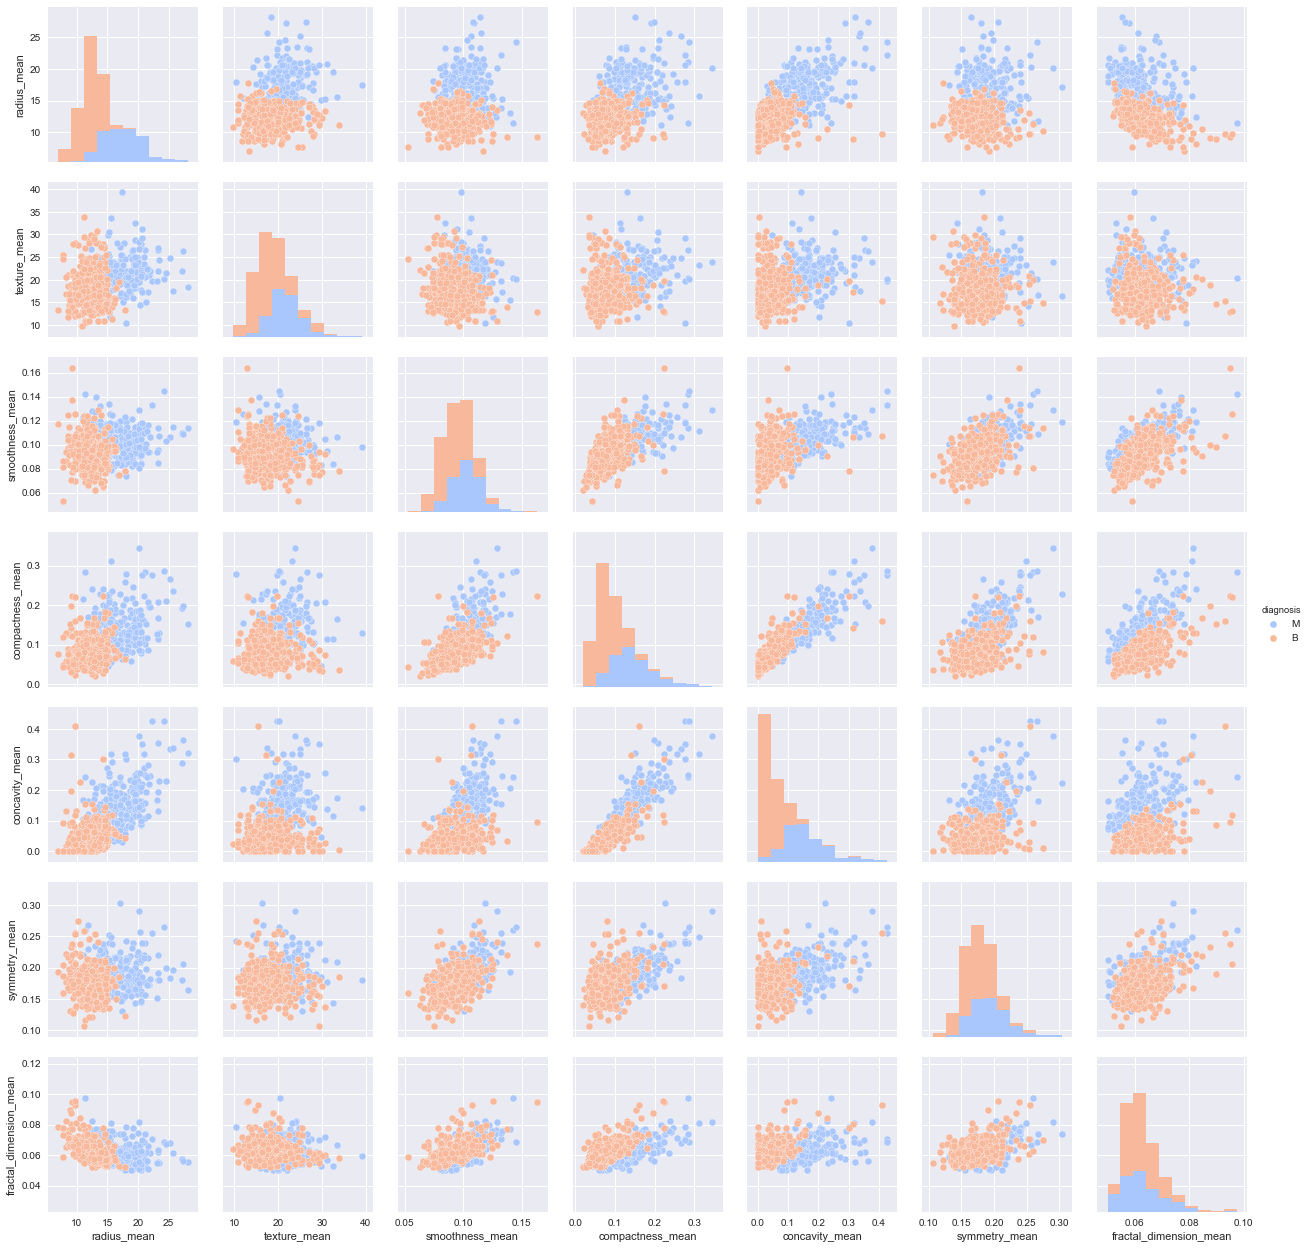

In [21]:
plt.figure(figsize=(15,15))
sns.pairplot(pd.concat([data.diagnosis,df[features_mean_2]], axis = 1), hue= 'diagnosis', palette='coolwarm')

Last but not least, will check if there is any missing data in the dataset:

# Train Test Split

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [24]:
X = df[allfeatures]

In [25]:
print(X.shape)

(569, 30)


In [26]:
y = df['diagnosis']

In [27]:
y.shape

(569,)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [32]:
print(X.shape, y.shape)

(569, 30) (569,)


In [33]:
score_list = ['accuracy', 'precision', 'recall']

def cross_validate_with_statistics(classifier, X, y):

    scores = cross_validate(classifier, X, y, 
                            cv=KFold(10, shuffle=True, random_state=42), 
                            scoring=score_list, return_train_score=True,
                            )
    
    # get mean and std of 
    means = {s:np.mean(scores[s]) for s in scores}
    stds = {s:np.std(scores[s]) for s in scores}

    return means, stds

In [34]:
def logistic_regression(X, y, cs):
    
    scores_lr = np.zeros((len(cs),3,3))
    
    for i, c in enumerate(cs):
        # instantiate logisitc_regression classifier
        clf = LogisticRegression(C = c, random_state=101)
        # standarize to 0 and 1
        clf = make_pipeline(preprocessing.StandardScaler(), clf)
        lr_means, lr_stds = cross_validate_with_statistics(clf, X, y)

        scores_lr[i,0,0] = lr_means['test_accuracy']
        scores_lr[i,1,0] = lr_means['test_precision']
        scores_lr[i,2,0] = lr_means['test_recall']

        scores_lr[i,0,1] = lr_stds['test_accuracy']
        scores_lr[i,1,1] = lr_stds['test_precision']
        scores_lr[i,2,1] = lr_stds['test_recall']
        
        scores_lr[i,0,2] = lr_means['train_accuracy']
        scores_lr[i,1,2] = lr_means['train_precision']
        scores_lr[i,2,2] = lr_means['train_recall']
        
    return scores_lr

cs = [10**x for x in range(-3,3)]
scores_lr = logistic_regression(X,y, cs)

In [35]:
cs

[0.001, 0.01, 0.1, 1, 10, 100]

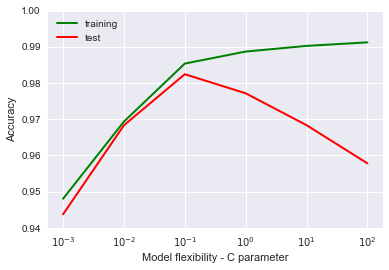

In [36]:
def tradeOff_lr(scores, tune_p, s, ss):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = ax.plot(tune_p, scores[:,0,2], color = 'green', lw = 2, label = 'training')
    line, = ax.plot(tune_p, scores[:,0,0], color = 'red' , lw = 2, label = 'test')

    ax.legend(loc = 'best')

    ax.set_xscale('log')
    ax.set_ylim(.94, 1)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Model flexibility - '+ss+'')

    plt.savefig('figs/'+s+'.pdf')

tradeOff_lr(scores_lr, cs, 'tradeoff_lr', 'C parameter')

In [37]:
def lr_plot(scores, tune_p, s):
    
    from matplotlib.ticker import FormatStrFormatter
    
    # precision recall plot
    # recall
    xpl = scores[:,2,0]
    # precision
    ypl = scores[:,1,0]

    xerr = scores[:,2,1]
    yerr = scores[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

    plt.scatter(xpl, ypl, c=tune_p, cmap = 'summer',label='logistic')
    plt.colorbar(format=FormatStrFormatter('%i'), label='$c$')

    plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)
    
    for i,c in enumerate(tune_p):
        plt.annotate(r"$c={}$".format(c), (xpl[i]-0.02 , ypl[i]-0.009))

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.9, 1.005)
    plt.xlim(0.4, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

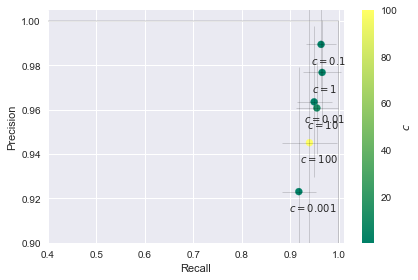

In [38]:
lr_plot(scores_lr, cs, 'logistic_regression')

In [39]:
# ROC curve on C = 0.1
lr = LogisticRegression(C=1000)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

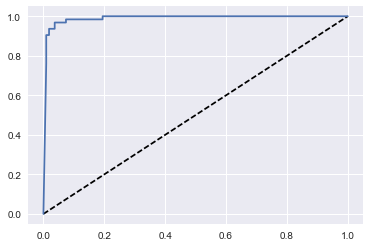

In [40]:
from sklearn.metrics import roc_curve

y_pred_prob = lr.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.show()


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96       108
          1       0.89      0.98      0.93        63

avg / total       0.95      0.95      0.95       171



In [42]:
# lr = LogisticRegression().fit(X_train, y_train)
# lr_01 = LogisticRegression().fit(X_train, y_train)
# lr_001 = LogisticRegression().fit(X_train, y_train)

# plt.plot(lgr.coef_.T,'o',label='C=1')
# plt.plot(lgr100.coef_.T,'*',label='C=0.1')
# plt.plot(lgr001.coef_.T,'-',label='C=0.01')
# plt.xticks(range(df.drop('diagnosis', axis = 1).shape[1]),df.drop('diagnosis', axis = 1).columns,rotation=90)
# plt.ylim(-6,6)
# plt.legend()
# plt.savefig('figs/logistic_coef.pdf')

In [43]:
# ######default C=1#####
# lgr=LogisticRegression().fit(X_train,y_train)
# print("training set score: %f" % lgr.score(X_train, y_train))
# print('\n'"test set score: %f" % lgr.score(X_test, y_test))
 
# ######increase C to 100#####
# lgr100=LogisticRegression(C=100).fit(X_train,y_train)
# print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
# print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))
 
# ######decrease C to 0.01#####
# lgr001=LogisticRegression(C=0.01).fit(X_train,y_train)
# print('\n'"training set score of lgr001: %f" % lgr001.score(X_train, y_train))
# print('\n'"test set score of lgr001: %f" % lgr001.score(X_test, y_test))
 
# import matplotlib.pyplot as plt
# plt.plot(lgr.coef_.T,'o',label='C=1')
# plt.plot(lgr100.coef_.T,'*',label='C=100')
# plt.plot(lgr001.coef_.T,'-',label='C=0.01')
# plt.xticks(range(df.drop('diagnosis', axis = 1).shape[1]),df.drop('diagnosis', axis = 1).columns,rotation=90)
# plt.ylim(-6,6)
# plt.legend()
# plt.show()

# LDA & QDA

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [45]:
def LDA(X, y):
    
    scores_lda = np.zeros((3,2))
    # instantiate logisitc_regression classifier
    clf = LinearDiscriminantAnalysis(solver= 'svd', n_components=2)
    # standarize to 0 and 1
    clf = make_pipeline(preprocessing.StandardScaler(), clf)
    lda_means, lda_stds = cross_validate_with_statistics(clf, X, y)

    scores_lda[0,0] = lda_means['test_accuracy']
    scores_lda[1,0] = lda_means['test_precision']
    scores_lda[2,0] = lda_means['test_recall']

    scores_lda[0,1] = lda_stds['test_accuracy']
    scores_lda[1,1] = lda_stds['test_precision']
    scores_lda[2,1] = lda_stds['test_recall']
        
        
    return scores_lda

scores_lda = LDA(X,y)

In [46]:
scores_lda

array([[ 0.95432331,  0.01785538],
       [ 0.98823529,  0.02352941],
       [ 0.89038587,  0.04370406]])

In [47]:
def QDA(X, y):
    
    scores_qda = np.zeros((3,2))
    # instantiate logisitc_regression classifier
    clf = QuadraticDiscriminantAnalysis()
    # standarize to 0 and 1
    clf = make_pipeline(preprocessing.StandardScaler(), clf)
    qda_means, qda_stds = cross_validate_with_statistics(clf, X, y)

    scores_qda[0,0] = qda_means['test_accuracy']
    scores_qda[1,0] = qda_means['test_precision']
    scores_qda[2,0] = qda_means['test_recall']

    scores_qda[0,1] = qda_stds['test_accuracy']
    scores_qda[1,1] = qda_stds['test_precision']
    scores_qda[2,1] = qda_stds['test_recall']
        
        
    return scores_qda

scores_qda = QDA(X,y)

In [48]:
clf = QuadraticDiscriminantAnalysis()
clf = make_pipeline(preprocessing.StandardScaler(), clf)
cross_validate_with_statistics(clf, X, y)

({'fit_time': 0.0047813415527343753,
  'score_time': 0.0027976989746093749,
  'test_accuracy': 0.95773809523809528,
  'test_precision': 0.94328070175438605,
  'test_recall': 0.94301679412205708,
  'train_accuracy': 0.97305106298732935,
  'train_precision': 0.97272793112832401,
  'train_recall': 0.95445451800589498},
 {'fit_time': 0.0025808711375512636,
  'score_time': 0.0013221986611025715,
  'test_accuracy': 0.019903940180106286,
  'test_precision': 0.054334128916020685,
  'test_recall': 0.049359951210414185,
  'train_accuracy': 0.003132345601072218,
  'train_precision': 0.0062131583678074875,
  'train_recall': 0.0065543228390239862})

In [49]:
scores_qda

array([[ 0.9577381 ,  0.01990394],
       [ 0.9432807 ,  0.05433413],
       [ 0.94301679,  0.04935995]])

# Decision Trees

In [50]:
# Adapted mostly from the book Introduction to Machine Learning with Python by Andreas C. Müller

In [51]:
X.shape

(569, 30)

In [52]:
y.shape

(569,)

In [53]:
from sklearn.tree import DecisionTreeClassifier

def decision_trees(X, y, tune_p):
    
    scores = np.zeros((len(tune_p),3,3))
    
    for i, t in enumerate(tune_p):
        # instantiate Decision_tree classifier
        if t == 0:
            clf = DecisionTreeClassifier(random_state=42)
        else:
            clf = DecisionTreeClassifier(max_depth = t, random_state=42)
        
        means, stds = cross_validate_with_statistics(clf, X, y)

        scores[i,0,0] = means['test_accuracy']
        scores[i,1,0] = means['test_precision']
        scores[i,2,0] = means['test_recall']

        scores[i,0,1] = stds['test_accuracy']
        scores[i,1,1] = stds['test_precision']
        scores[i,2,1] = stds['test_recall']
        
        scores[i,0,2] = means['train_accuracy']
        scores[i,1,2] = means['train_precision']
        scores[i,2,2] = means['train_recall']
        
    return scores

max_depth = list(range(1,8))
scores_dt = decision_trees(X,y, max_depth)

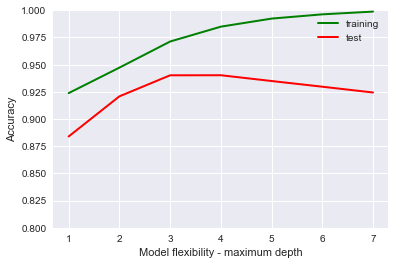

In [54]:
def tradeOff_dt(scores, tune_p, s, ss):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = ax.plot(tune_p, scores[:,0,2], color = 'green', lw = 2, label = 'training')
    line, = ax.plot(tune_p, scores[:,0,0], color = 'red' , lw = 2, label = 'test')

    ax.legend(loc = 'best')

    ax.set_ylim(.8, 1)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Model flexibility - '+ss+'')

    plt.savefig('figs/'+s+'.pdf')

tradeOff_dt(scores_dt, max_depth, 'tradeoff_dt_maxdepth', 'maximum depth')

In [55]:
print("Accuracy on train_set (depth = 4): {:.3f}".format(scores_dt[3,0,2]))
print("Accuracy on test_set  (depth = 4): {:.3f}".format(scores_dt[3,0,0]))

Accuracy on train_set (depth = 4): 0.985
Accuracy on test_set  (depth = 4): 0.940


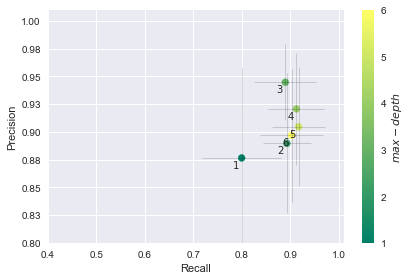

In [56]:
def dt_plot(scores, tune_p, s, ss):
    
    from matplotlib.ticker import FormatStrFormatter
    
    # precision recall plot
    # recall
    xpl = scores[:,2,0]
    # precision
    ypl = scores[:,1,0]

    xerr = scores[:,2,1]
    yerr = scores[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)
    plt.scatter(xpl, ypl, c = tune_p, cmap='summer')
    plt.colorbar(format=FormatStrFormatter('%i'), label='$'+ss+'$')
    for i,c in enumerate(tune_p):
        plt.annotate(r"${}$".format(c), (xpl[i]-0.02 , ypl[i]-0.009))

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.8, 1.01)
    plt.xlim(0.4, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

dt_plot(scores_dt[:6], max_depth[:6], 'prec_recall_dt_maxdepth', 'max-depth')

In [57]:
def decision_trees(X, y, tune_p):
    
    scores = np.zeros((len(tune_p),3,3))
    
    for i, t in enumerate(tune_p):
        # instantiate Decision_tree classifier
        if t == 0:
            clf = DecisionTreeClassifier(random_state=42)
        else:
            clf = DecisionTreeClassifier(max_leaf_nodes = t, random_state=42)
            
        means, stds = cross_validate_with_statistics(clf, X, y)

        scores[i,0,0] = means['test_accuracy']
        scores[i,1,0] = means['test_precision']
        scores[i,2,0] = means['test_recall']

        scores[i,0,1] = stds['test_accuracy']
        scores[i,1,1] = stds['test_precision']
        scores[i,2,1] = stds['test_recall']
        
        scores[i,0,2] = means['train_accuracy']
        scores[i,1,2] = means['train_precision']
        scores[i,2,2] = means['train_recall']
        
    return scores

max_leaf_nodes = list(range(2,20,2))
print(max_leaf_nodes)
scores_dt = decision_trees(X,y, max_leaf_nodes)

[2, 4, 6, 8, 10, 12, 14, 16, 18]


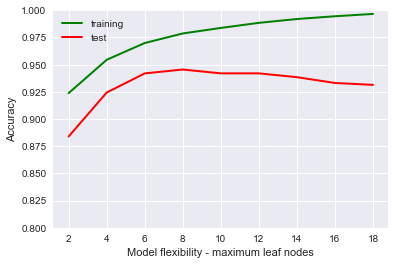

In [58]:
def tradeOff_dt(scores, tune_p, s, ss):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    line, = ax.plot(tune_p, scores[:,0,2], color = 'green', lw = 2, label = 'training')
    line, = ax.plot(tune_p, scores[:,0,0], color = 'red' , lw = 2, label = 'test')

    ax.legend(loc = 'best')

    ax.set_ylim(.8, 1)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Model flexibility - '+ss+'')

    plt.savefig('figs/'+s+'.pdf')

tradeOff_dt(scores_dt, max_leaf_nodes, 'tradeoff_dt_maxleaf', 'maximum leaf nodes')

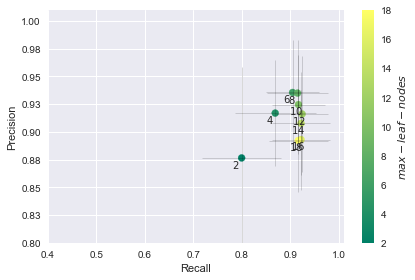

In [59]:
dt_plot(scores_dt, max_leaf_nodes, 'prec_recall_dt_maxleafnodes', 'max-leaf-nodes')

In [60]:
# Showing feature importance for depth of 3
clf2 = DecisionTreeClassifier(random_state=42, max_leaf_nodes= 20)
clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


In [61]:
# Showing feature importance for depth of 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print("Feature importances:\n{}".format(clf.feature_importances_))

Feature importances:
[ 0.          0.02516887  0.          0.          0.          0.          0.
  0.8099784   0.          0.          0.          0.          0.
  0.01491592  0.          0.          0.          0.          0.          0.
  0.04348197  0.0661448   0.          0.04031006  0.          0.          0.
  0.          0.          0.        ]


(-1, 30)

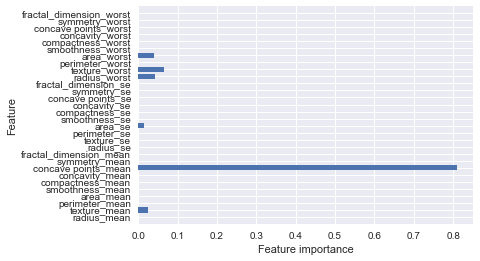

In [62]:
plt.barh(range(X.shape[1]), clf.feature_importances_, align = 'center')
plt.yticks(np.arange(X.shape[1]), df.drop('diagnosis', axis = 1).columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, X.shape[1])

In [68]:
### Drawing the decision tree graph

# After having big troubles in exporting the decision trees for unknown reasons, 
# decided to extract the tree from a web interface belongs to graphviz: http://webgraphviz.com

# The following code makes the diagraph as a text in which is feeded to the above link
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=df.drop('diagnosis', axis = 1).columns, impurity=False, filled=True)